# EDA of Telco Customer Churn

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append("../src/")

import edafunc

## Get the data

In [57]:
data_churn = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data_churn.copy()

In [58]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Form

Let's see the dimensions of the dataset:

In [59]:
shapes = data.shape
print("Nombre de lignes: ", shapes[0])
print("Nombre de colonnes (features + target): ", shapes[1])

Nombre de lignes:  7043
Nombre de colonnes (features + target):  21


In [60]:
value_counts = data["Churn"].value_counts(normalize=True)
print(f"Taux « No »: {np.round(value_counts["No"] * 100, 2)} %")
print(f"Taux « Yes »: {np.round(value_counts["Yes"] * 100, 2)} %")


Taux « No »: 73.46 %
Taux « Yes »: 26.54 %


We observe an imbalance with the the target column : 
- 73.46% for « No »
- 26.54% for « Yes »

### Dataset Adjustment

Let's leave out the « customerID » column, it's not useful the our analysis:

In [61]:
data = data.drop(columns=["customerID"])

In [62]:
# Adjustment using SMOTE
data_balanced = edafunc.oversampling_SMOTE(data, "Churn")

[[0.000e+00 1.000e+00 0.000e+00 ... 1.000e+00 2.000e+00 2.505e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 3.000e+00 1.466e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 1.570e+02]
 ...
 [0.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.994e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 2.660e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 5.407e+03]]


Now we can observe that the target column is imbalanced :

<Axes: ylabel='count'>

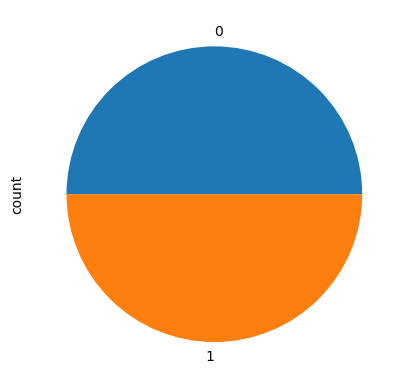

In [63]:
data_balanced["Churn"].value_counts().plot.pie()

Let's analyze the variable types that make up our dataset :

In [64]:
data.dtypes.value_counts()

object     17
int64       2
float64     1
Name: count, dtype: int64

There are :
- **17** objects
- **2** integers
- **1** real

### Missing values

Let's check missing values and duplicates :

In [65]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
duplicates = data[data.duplicated(keep=False)]
print(duplicates.shape)

(42, 20)


In [ ]:
duplicates.head()